# Embeddings

This lab is designed to help you solidify your understanding of embeddings by applying them to tasks like semantic similarity, clustering, and building a semantic search system.

### Tasks:
- Task 1: Semantic Similarity Comparison
- Task 2: Document Clustering
- Task 3: Enhance the Semantic Search System


## Task 1: Semantic Similarity Comparison
### Objective:
Compare semantic similarity between pairs of sentences using cosine similarity and embeddings.

### Steps:
1. Load a pre-trained Sentence Transformer model.
2. Encode the sentence pairs.
3. Compute cosine similarity for each pair.

### Dataset:
- "A dog is playing in the park." vs. "A dog is running in a field."
- "I love pizza." vs. "I enjoy ice cream."
- "What is AI?" vs. "How does a computer learn?"


In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sentence pairs
sentence_pairs = [
    ("A dog is playing in the park.", "A dog is running in a field."),
    ("I love pizza.", "I enjoy ice cream."),
    ("What is AI?", "How does a computer learn?")
]

# Compute similarities

#YOUR CODE HERE
for pair in sentence_pairs:
    embeddings = model.encode(pair)

    similarity = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

    print(f"Similarity between '{pair[0]}' and '{pair[1]}': {similarity:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity between 'A dog is playing in the park.' and 'A dog is running in a field.': 0.5220
Similarity between 'I love pizza.' and 'I enjoy ice cream.': 0.5281
Similarity between 'What is AI?' and 'How does a computer learn?': 0.3194


### Questions:
- Which sentence pairs are the most semantically similar? Why?

I love pizza and I enjoy ice cream is slightly more similar than the dog sentence. Possibly because both sentences are talking in first person, are positive and are about food.

- Can you think of cases where cosine similarity might fail to capture true semantic meaning?

In the case that the sentence was "A dog is running a park", the cosine could not understand that the dog was managing a park, instead of running through it.


## Task 2: Document Clustering
### Objective:
Cluster a set of text documents into similar groups based on their embeddings.

### Steps:
1. Encode the documents using Sentence Transformers.
2. Use KMeans clustering to group the documents.
3. Analyze the clusters for semantic meaning.

In [2]:
from sklearn.cluster import KMeans

# Documents to cluster
documents = [
    "What is the capital of France?",
    "How do I bake a chocolate cake?",
    "What is the distance between Earth and Mars?",
    "How do I change a flat tire on a car?",
    "What is the best way to learn Python?",
    "How do I fix a leaky faucet?"
]

# Encode documents

#YOUR CODE HERE

embeddings = model.encode(documents)



In [3]:
# Perform KMeans clustering

#YOUR CODE HERE
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

clusters = kmeans.labels_

for i, cluster in enumerate(clusters):
    print(f"Document: '{documents[i]}' is in Cluster: {cluster}")




Document: 'What is the capital of France?' is in Cluster: 0
Document: 'How do I bake a chocolate cake?' is in Cluster: 0
Document: 'What is the distance between Earth and Mars?' is in Cluster: 0
Document: 'How do I change a flat tire on a car?' is in Cluster: 1
Document: 'What is the best way to learn Python?' is in Cluster: 1
Document: 'How do I fix a leaky faucet?' is in Cluster: 1


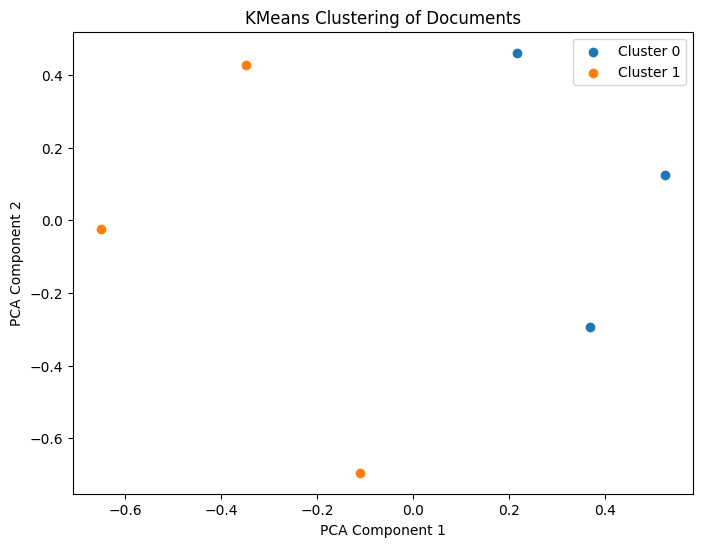

In [4]:
# Print cluster assignments

#YOUR CODE HERE

embeddings = model.encode(documents)

from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    points = reduced_embeddings[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")

plt.title("KMeans Clustering of Documents")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### Questions:
- How many clusters make the most sense? Why?

Two clusters make more sense. The cluster 0 can be more about general knlowledge, although the cake question could be inserted in the cluster 1, which seems more related to follow tutorials. I tried three clusters, but the sentences do not seem to be well classified. What does the distance to Mars and Earth has to do with baking a cake?
- Examine the documents in each cluster. Are they semantically meaningful? Can you assign a semantic "theme" to each cluster?

I can say that the cluster zero is about learniong general knowledge. Perhaps it connects Capital of France and distance between planets with Geography, and bake a cake with Chemistry. The cluster 2 is more a DIY tutorial thing.

- Try this exercise with a larger dataset of your choice

In [6]:
import pandas as pd

# Load the tab-separated file
bbc = pd.read_csv('bbc-news-data.csv', sep='\t')

# Display the first few rows
bbc.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [7]:
documents = bbc['title'].tolist()  # Convert titles to a list
print(documents[:5])  # Print the first 5 titles

['Ad sales boost Time Warner profit', 'Dollar gains on Greenspan speech', 'Yukos unit buyer faces loan claim', "High fuel prices hit BA's profits", 'Pernod takeover talk lifts Domecq']


In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Remove special characters
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)  # Remove stopwords
    return text

# Apply preprocessing
documents = [preprocess_text(title) for title in documents]
print(documents[:5])  # Check the first 5 preprocessed titles


['ad sales boost time warner profit', 'dollar gains greenspan speech', 'yukos unit buyer faces loan claim', 'high fuel prices hit bas profits', 'pernod takeover talk lifts domecq']


In [9]:
from sentence_transformers import SentenceTransformer

# Load pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the preprocessed titles
embeddings = model.encode(documents)
print(f"Shape of embeddings: {embeddings.shape}")  # Check the shape

Shape of embeddings: (2225, 384)


In [11]:
num_clusters = 5  # Adjust based on your dataset or experiment with different values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

# Get cluster assignments
clusters = kmeans.labels_

# Add cluster labels to the dataset
bbc['cluster'] = clusters
print(bbc[['title', 'cluster']].sample(10))  # Display titles with their cluster assignments


                                  title  cluster
1738   Young debut cut short by Ginepri        1
1770   Hewitt falls to Dent in Adelaide        1
620   Elton plays Paris charity concert        0
1728                   Italy 8-38 Wales        1
2144    Consumer concern over RFID tags        2
13     Telegraph newspapers axe 90 jobs        4
847    Howl helps boost Japan's cinemas        0
2014     Online commons to spark debate        3
1120   Blair to face MPs amid feud talk        3
1203   Tory 'stalking horse' Meyer dies        3


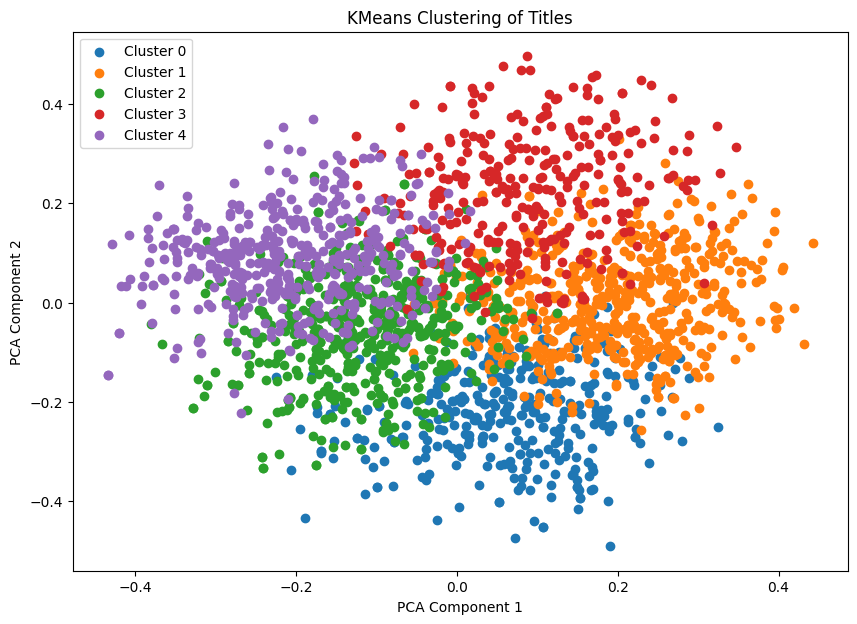

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Convert clusters to a numpy array (if not already)
clusters = np.array(kmeans.labels_)

# Plot the clusters
plt.figure(figsize=(10, 7))
for i in range(kmeans.n_clusters):
    points = reduced_embeddings[clusters == i]  # Get points for the current cluster
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")

plt.title("KMeans Clustering of Titles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## Task 3: Semantic Search System
### Objective:
Create a semantic search engine:
A user provides a query and you search the dataset for semantically relevant documents to return. Return the top 5 results.

### Dataset:
- Use the following set of documents:
    - "What is the capital of France?"
    - "How do I bake a chocolate cake?"
    - "What is the distance between Earth and Mars?"
    - "How do I change a flat tire on a car?"
    - "What is the best way to learn Python?"
    - "How do I fix a leaky faucet?"
    - "What are the best travel destinations in Europe?"
    - "How do I set up a local server?"
    - "What is quantum computing?"
    - "How do I build a mobile app?"


In [13]:
import numpy as np

# Documents dataset
documents = [
    "What is the capital of France?",
    "How do I bake a chocolate cake?",
    "What is the distance between Earth and Mars?",
    "How do I change a flat tire on a car?",
    "What is the best way to learn Python?",
    "How do I fix a leaky faucet?",
    "What are the best travel destinations in Europe?",
    "How do I set up a local server?",
    "What is quantum computing?",
    "How do I build a mobile app?"
]

# Compute document embeddings

#YOUR CODE HERE


model = SentenceTransformer('all-MiniLM-L6-v2')


doc_embeddings = model.encode(documents)


In [14]:
# Create the search function

from sklearn.metrics.pairwise import cosine_similarity
#This function should encode the user query and return the top N documents that most resemble it
def semantic_search(query, documents, doc_embeddings, top_n=5):
    # YOUR CODE HERE

    query_embedding = model.encode([query])


    similarities = cosine_similarity(query_embedding, doc_embeddings)[0]


    top_indices = np.argsort(similarities)[::-1][:top_n]


    results = [(documents[idx], similarities[idx]) for idx in top_indices]

    return results

In [15]:
# Test the search function
query = "Explain programming languages."
semantic_search(query, documents, doc_embeddings)

[('What is quantum computing?', 0.4352478),
 ('What is the best way to learn Python?', 0.31878257),
 ('How do I build a mobile app?', 0.11044071),
 ('How do I set up a local server?', 0.0911265),
 ('What are the best travel destinations in Europe?', 0.0906478)]

### Questions:
- What are the top-ranked results for the given queries?<br>
'What is quantum computing?'<br>
'What is the best way to learn Python?'<br>
'How do I build a mobile app?',<br>
'How do I set up a local server?',<br>
'What are the best travel destinations in Europe?'<br>


- How can you improve the ranking explanation for users?<br>
Display the cosine score to show result relevance;<br>
Display relevant keywords;<br>
Include metadata, like category;<br>

- Try this approach with a larger dataset

In [20]:
bbc.head()

,category,filename,title,content,cluster
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,4
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,4
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,4
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,4
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1


In [21]:
from tqdm import tqdm

# Generate embeddings for all articles
doc_embeddings = []
for text in tqdm(bbc['content'].tolist()):
    doc_embeddings.append(model.encode(text))

# Convert to NumPy array for efficient processing
doc_embeddings = np.array(doc_embeddings)


100%|██████████| 2225/2225 [07:18<00:00,  5.07it/s]


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def semantic_search(query, documents, doc_embeddings, metadata, top_n=5):
    # Encode the query into an embedding
    query_embedding = model.encode([query])

    # Compute cosine similarity
    similarities = cosine_similarity(query_embedding, doc_embeddings)[0]

    # Get top N results
    top_indices = np.argsort(similarities)[::-1][:top_n]

    results = []
    for idx in top_indices:
        # Highlight query keywords in the document
        query_words = set(query.lower().split())
        highlighted_content = ' '.join([
            f"**{word}**" if word.lower() in query_words else word
            for word in documents[idx].split()
        ])

        # Prepare result with metadata
        result = {
            'Title': bbc.iloc[idx]['title'],
            'Category': metadata[idx],
            'Cosine Score': similarities[idx],
            'Highlighted Content': highlighted_content[:200] + '...'  # Show snippet
        }
        results.append(result)

    return results


In [25]:
# Prepare inputs for the search function
documents = bbc['content'].tolist()
metadata = bbc['category'].tolist()

# Sample query
query = "places to go on holidays"

# Perform search
results = semantic_search(query, documents, doc_embeddings, metadata)

# Display results
for result in results:
    print(f"Title: {result['Title']}")
    print(f"Category: {result['Category']}")
    print(f"Cosine Score: {result['Cosine Score']:.4f}")
    print(f"Snippet: {result['Highlighted Content']}\n")


Title: Drive to 'save' festive holidays
Category: politics
Cosine Score: 0.4145
Snippet: Efforts are being made **to** 'protect' workers' days off **on** Christmas Day and New Year's Day. Support is being sought for a bill which would ensure that large retailers in Scotland remain closed ...

Title: Christmas shoppers flock to tills
Category: business
Cosine Score: 0.3091
Snippet: Shops all over the UK reported strong sales **on** the last Saturday before Christmas with some claiming record-breaking numbers of festive shoppers. A spokesman for Manchester's Trafford Centre said ...

Title: Fockers fuel festive film chart
Category: entertainment
Cosine Score: 0.2806
Snippet: Comedy Meet The Fockers topped the festive box office in North America, setting a new record for Christmas Day. The sequel took $44.7m (£23.2m) between 24 and 26 December, according **to** studio esti...

Title: Hanks greeted at wintry premiere
Category: entertainment
Cosine Score: 0.2685
Snippet: Hollywood star Tom 

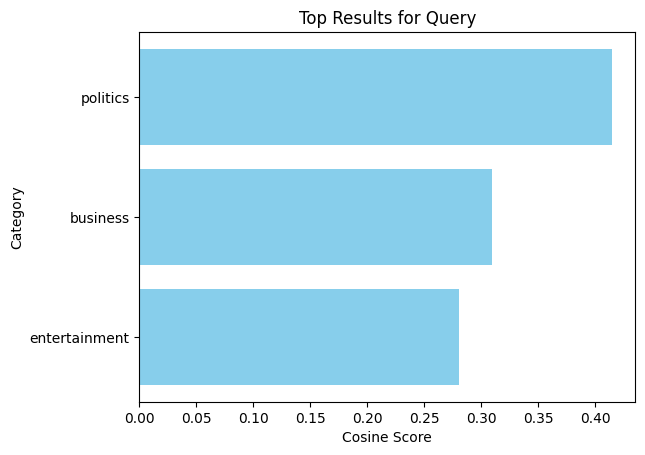

In [26]:
import matplotlib.pyplot as plt

# Extract data for visualization
categories = [result['Category'] for result in results]
cosine_scores = [result['Cosine Score'] for result in results]

# Plot bar chart
plt.barh(categories, cosine_scores, color='skyblue')
plt.xlabel('Cosine Score')
plt.ylabel('Category')
plt.title('Top Results for Query')
plt.gca().invert_yaxis()
plt.show()